In [23]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)






options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale


## Data partition

In [24]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [25]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.1320755 0.8679245 

In [26]:
class(df$deg_cat)

[1] "factor"

In [27]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    370     370 

## Model

In [28]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [29]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=91 
- Fold01.Rep1: nIter=91 
+ Fold02.Rep1: nIter=91 
- Fold02.Rep1: nIter=91 
+ Fold03.Rep1: nIter=91 
- Fold03.Rep1: nIter=91 
+ Fold04.Rep1: nIter=91 
- Fold04.Rep1: nIter=91 
+ Fold05.Rep1: nIter=91 
- Fold05.Rep1: nIter=91 
+ Fold06.Rep1: nIter=91 
- Fold06.Rep1: nIter=91 
+ Fold07.Rep1: nIter=91 
- Fold07.Rep1: nIter=91 
+ Fold08.Rep1: nIter=91 
- Fold08.Rep1: nIter=91 
+ Fold09.Rep1: nIter=91 
- Fold09.Rep1: nIter=91 
+ Fold10.Rep1: nIter=91 
- Fold10.Rep1: nIter=91 
Aggregating results
Selecting tuning parameters
Fitting nIter = 16 on full training set


In [30]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost= 5.32, loss=L1, epsilon=1 
- Fold01.Rep1: cost= 5.32, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=14.14, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=14.14, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost=57.46, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost=57.46, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost= 5.32, loss=L1, epsilon=1 
- Fold02.Rep1: cost= 5.32, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=14.14, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=14.14, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=57.46, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost=57.46, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost= 5.32, loss=L1, epsilon=1 
- Fold03.Rep1: cost= 5.32, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=14.14, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=14.14, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=57.46, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost=57.46, loss=L2_primal, epsilon=1 
+ Fold04.Rep1: cost= 5.32, loss=L1, epsilon=1 
- Fold04.Rep1: cost= 5.32, loss=L1,

## Results

Boosted Logistic Regression 

740 samples
 77 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 666, 666, 666, 666, 666, 666, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  15     0.8540541  0.7081081
  16     0.9001231  0.8002361
  91     0.8391892  0.6783784

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 16.


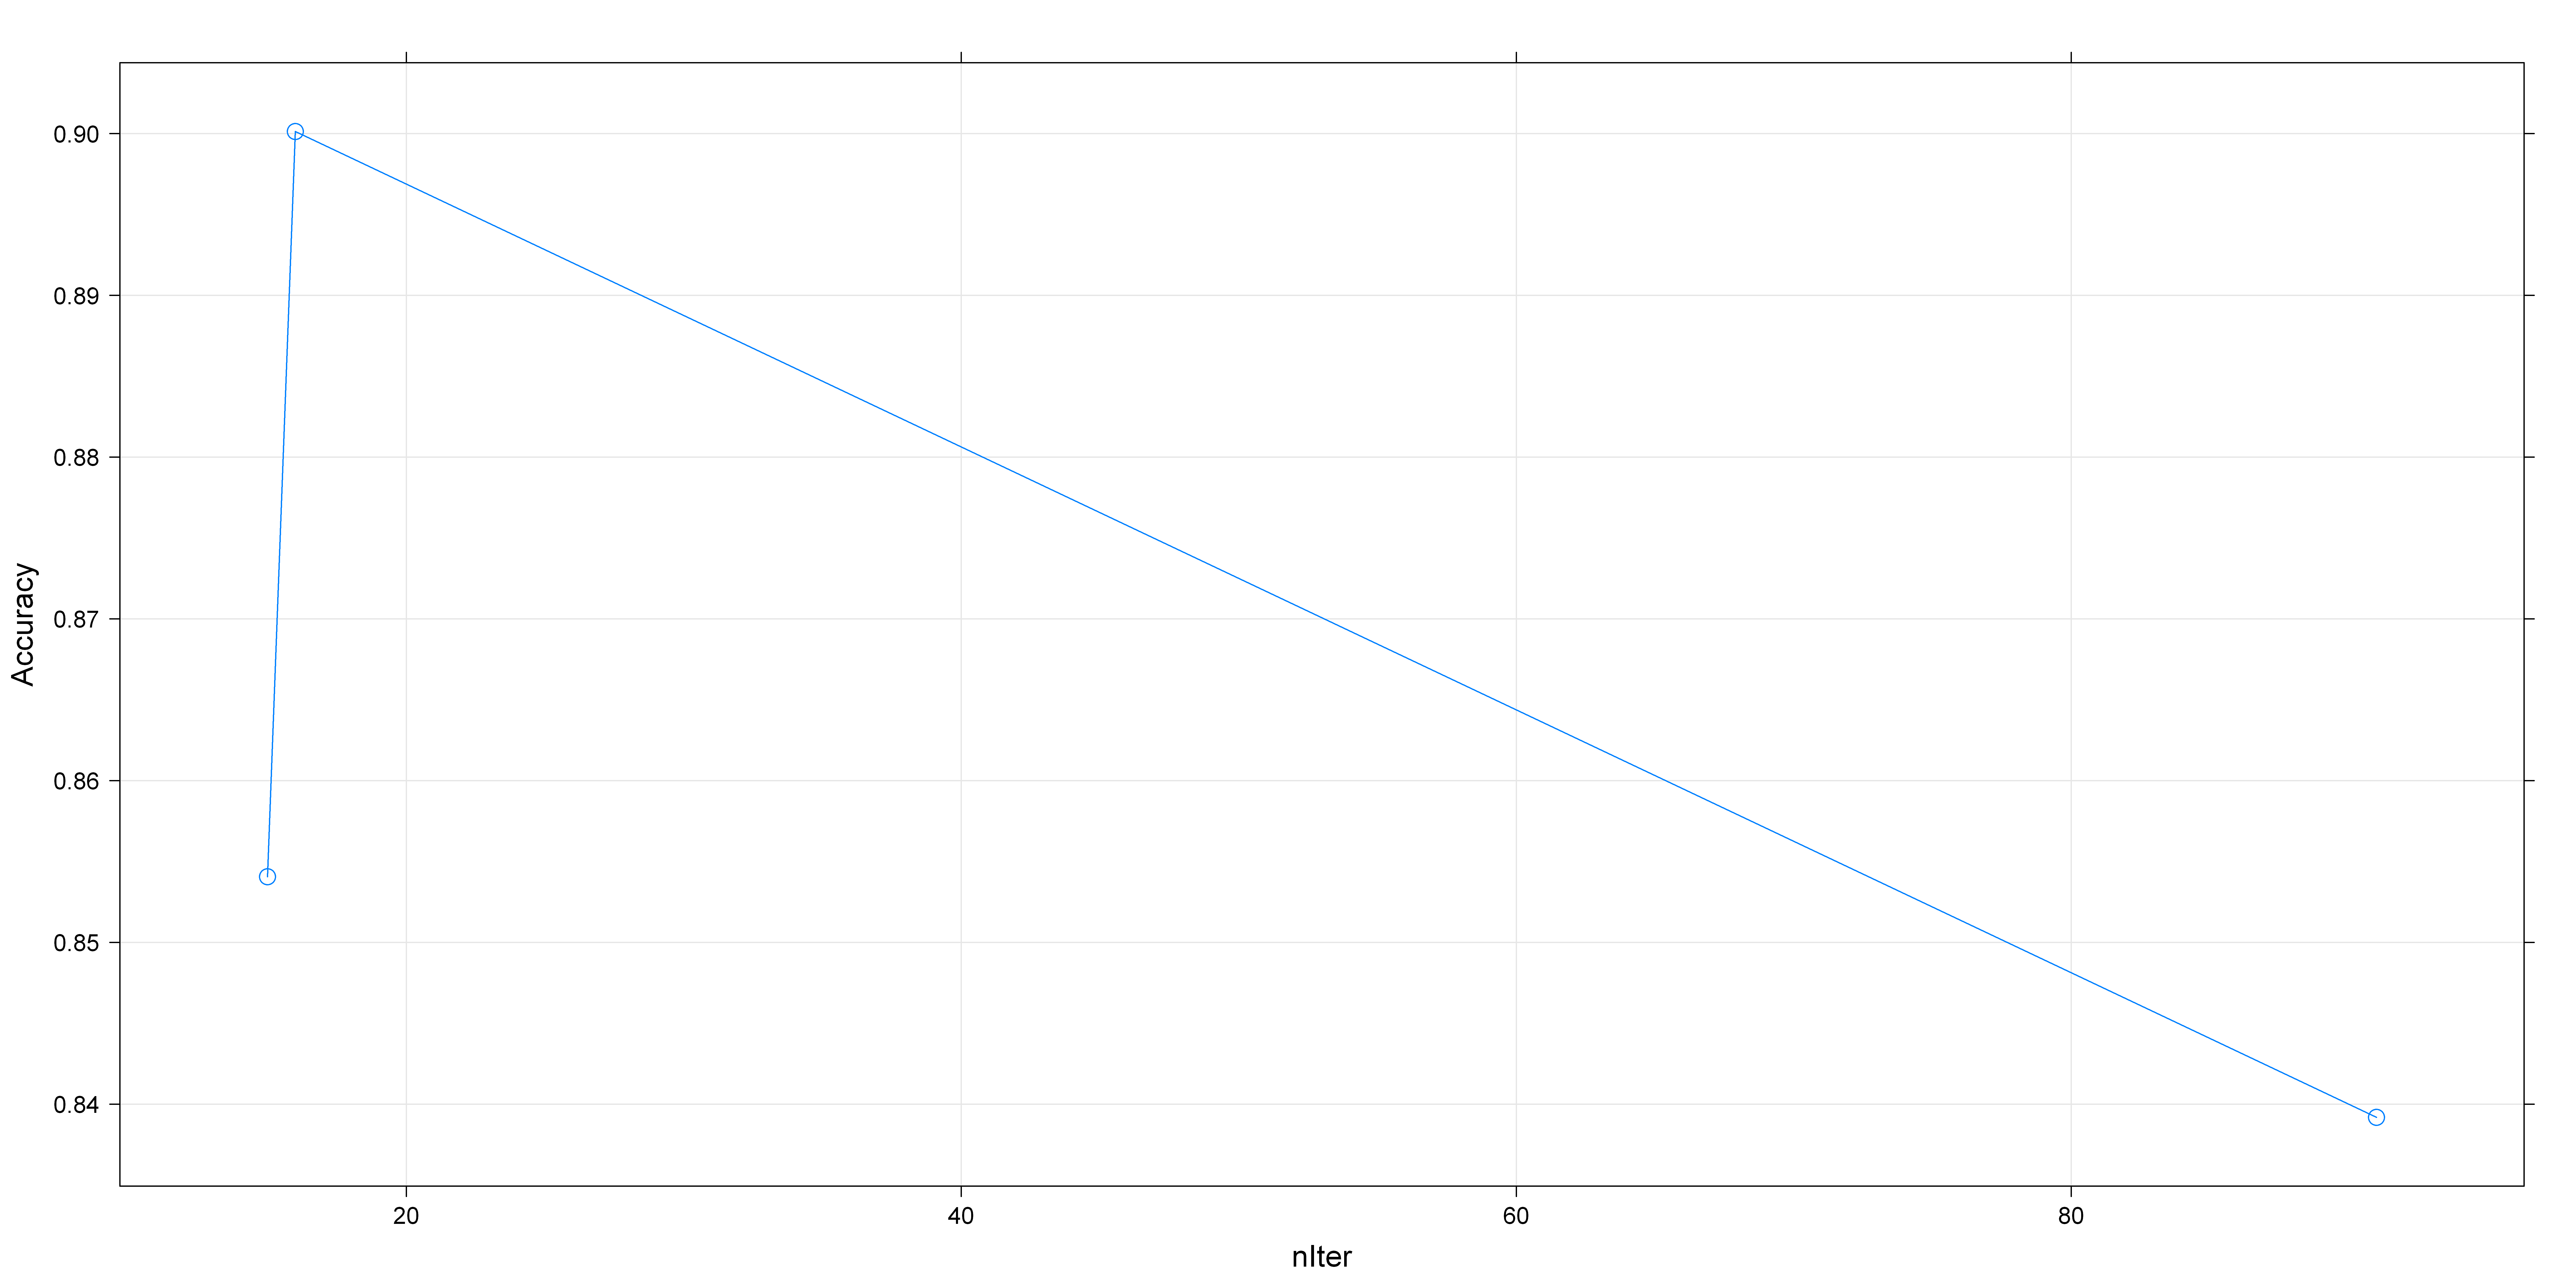

In [31]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

740 samples
 77 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 666, 666, 666, 666, 666, 666, ... 
Resampling results across tuning parameters:

  cost       loss       Accuracy   Kappa    
   5.320297  L1         0.8445946  0.6891892
  14.137169  L2_dual    0.8797297  0.7594595
  57.455693  L2_primal  0.8594595  0.7189189

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 14.13717, loss = L2_dual
 and epsilon = 1.


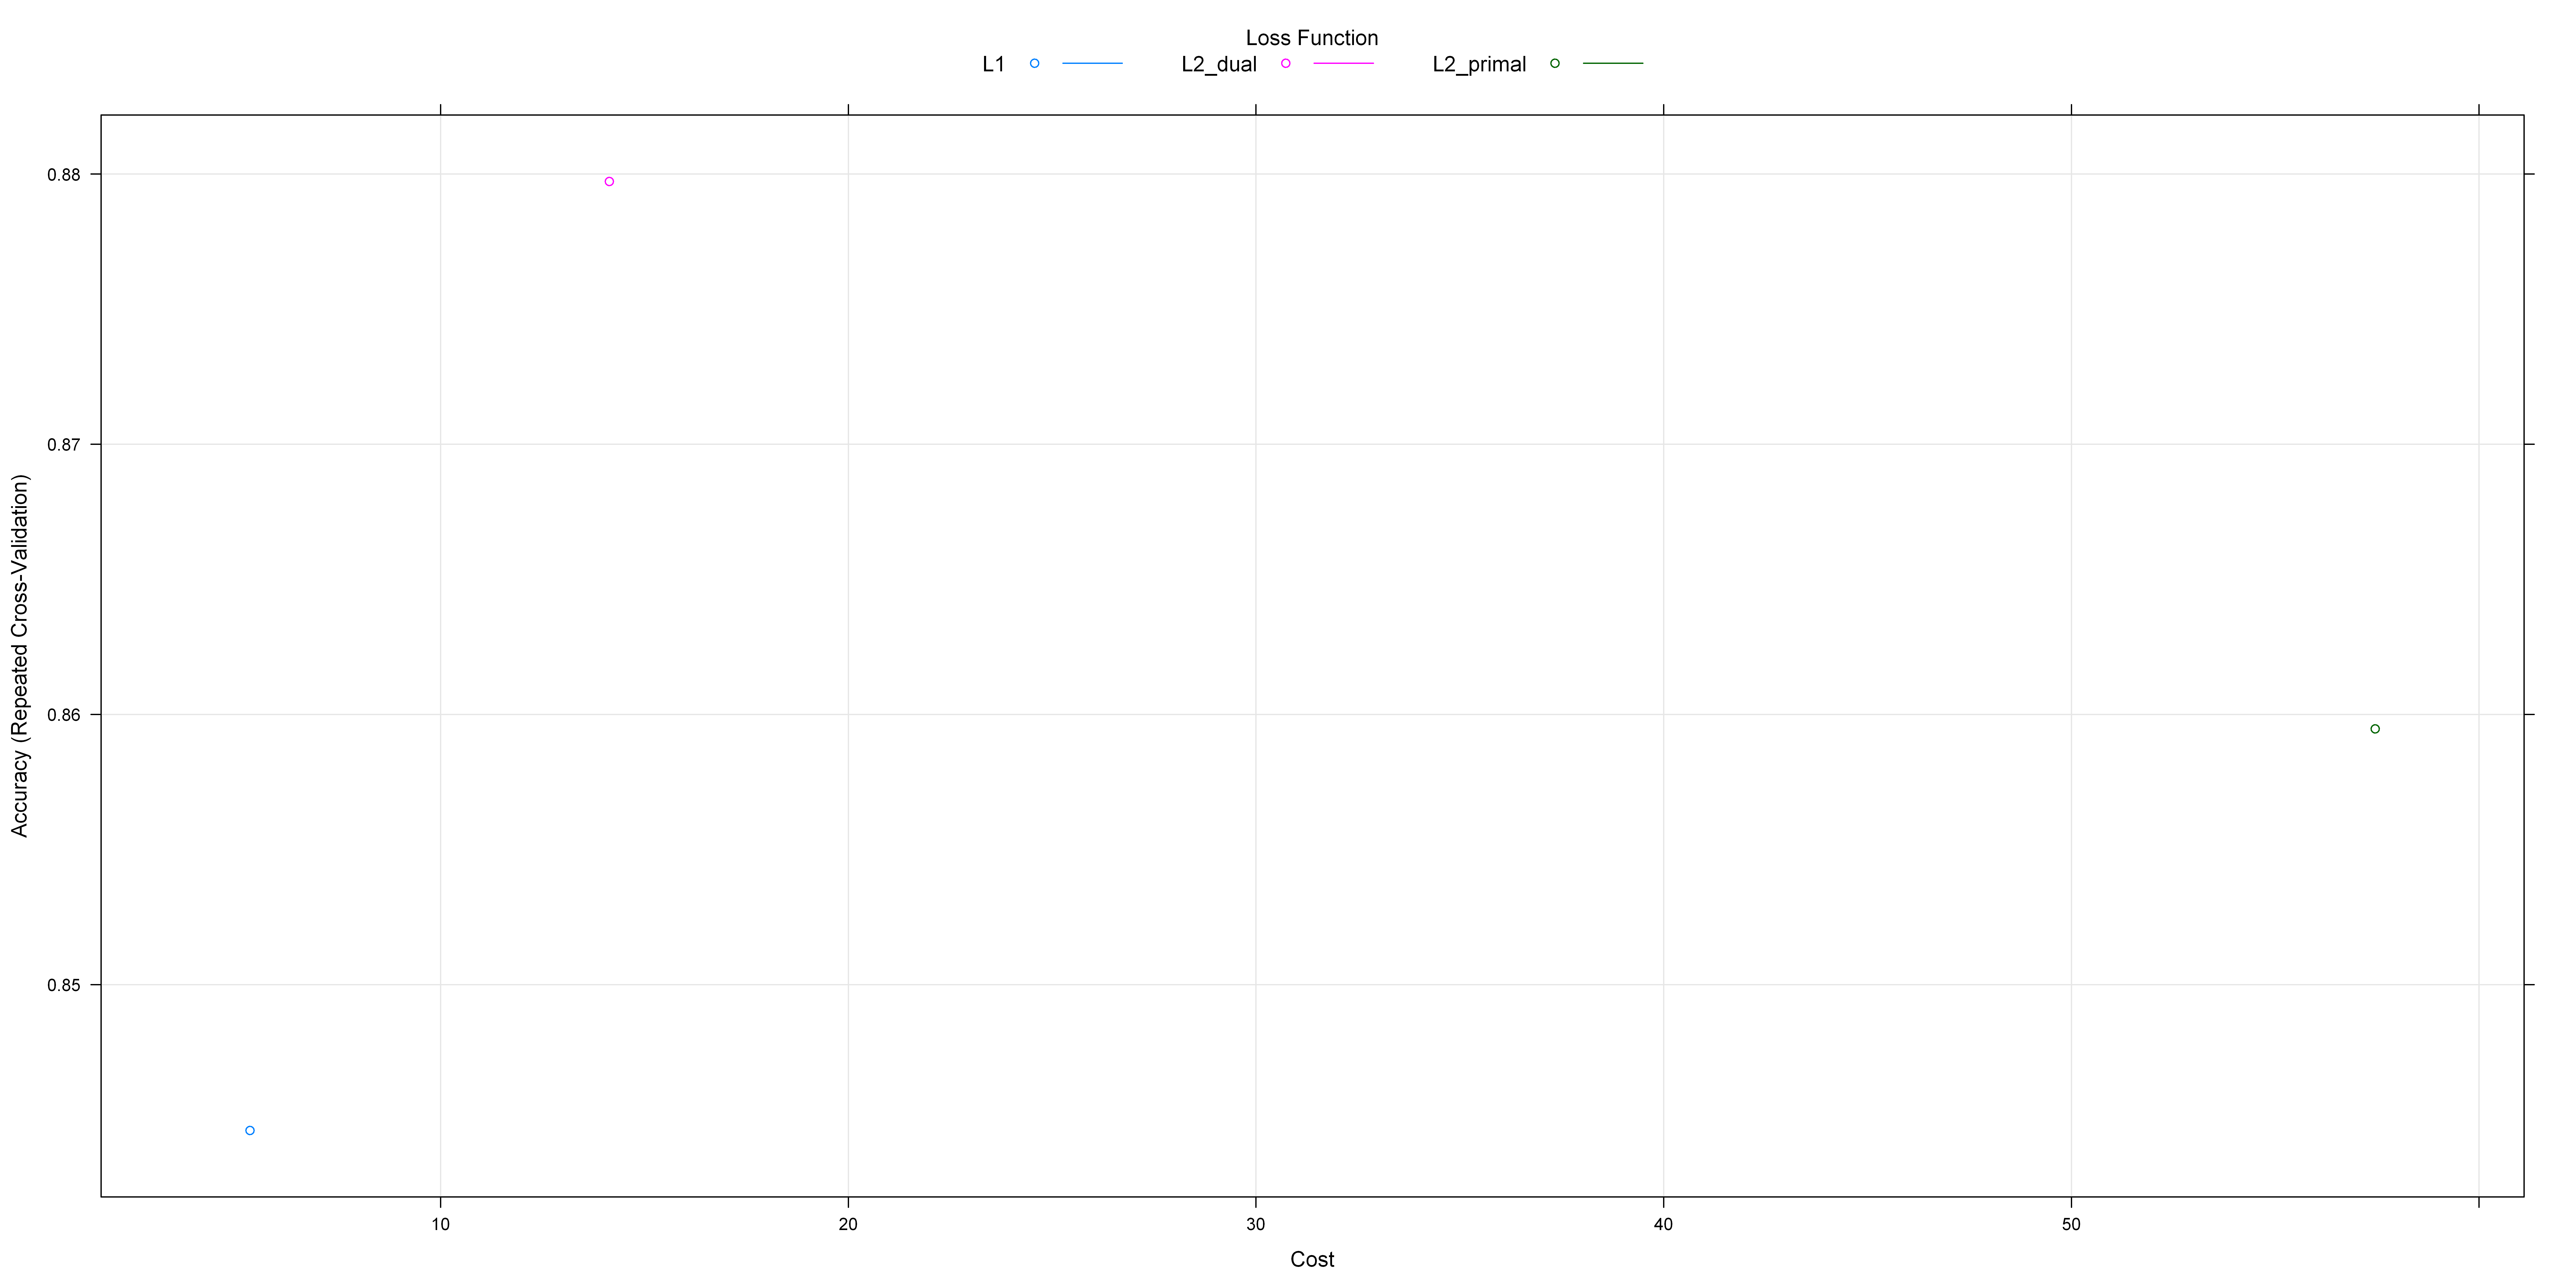

In [32]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.8593750 0.8867647 0.9016393 0.9001231 0.9186828 0.9272727    0
regLogistic 0.8108108 0.8547297 0.8851351 0.8797297 0.9054054 0.9729730    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.7203883 0.7733507 0.8035422 0.8002361 0.8370859 0.8546896    0
regLogistic 0.6216216 0.7094595 0.7702703 0.7594595 0.8108108 0.9459459    0


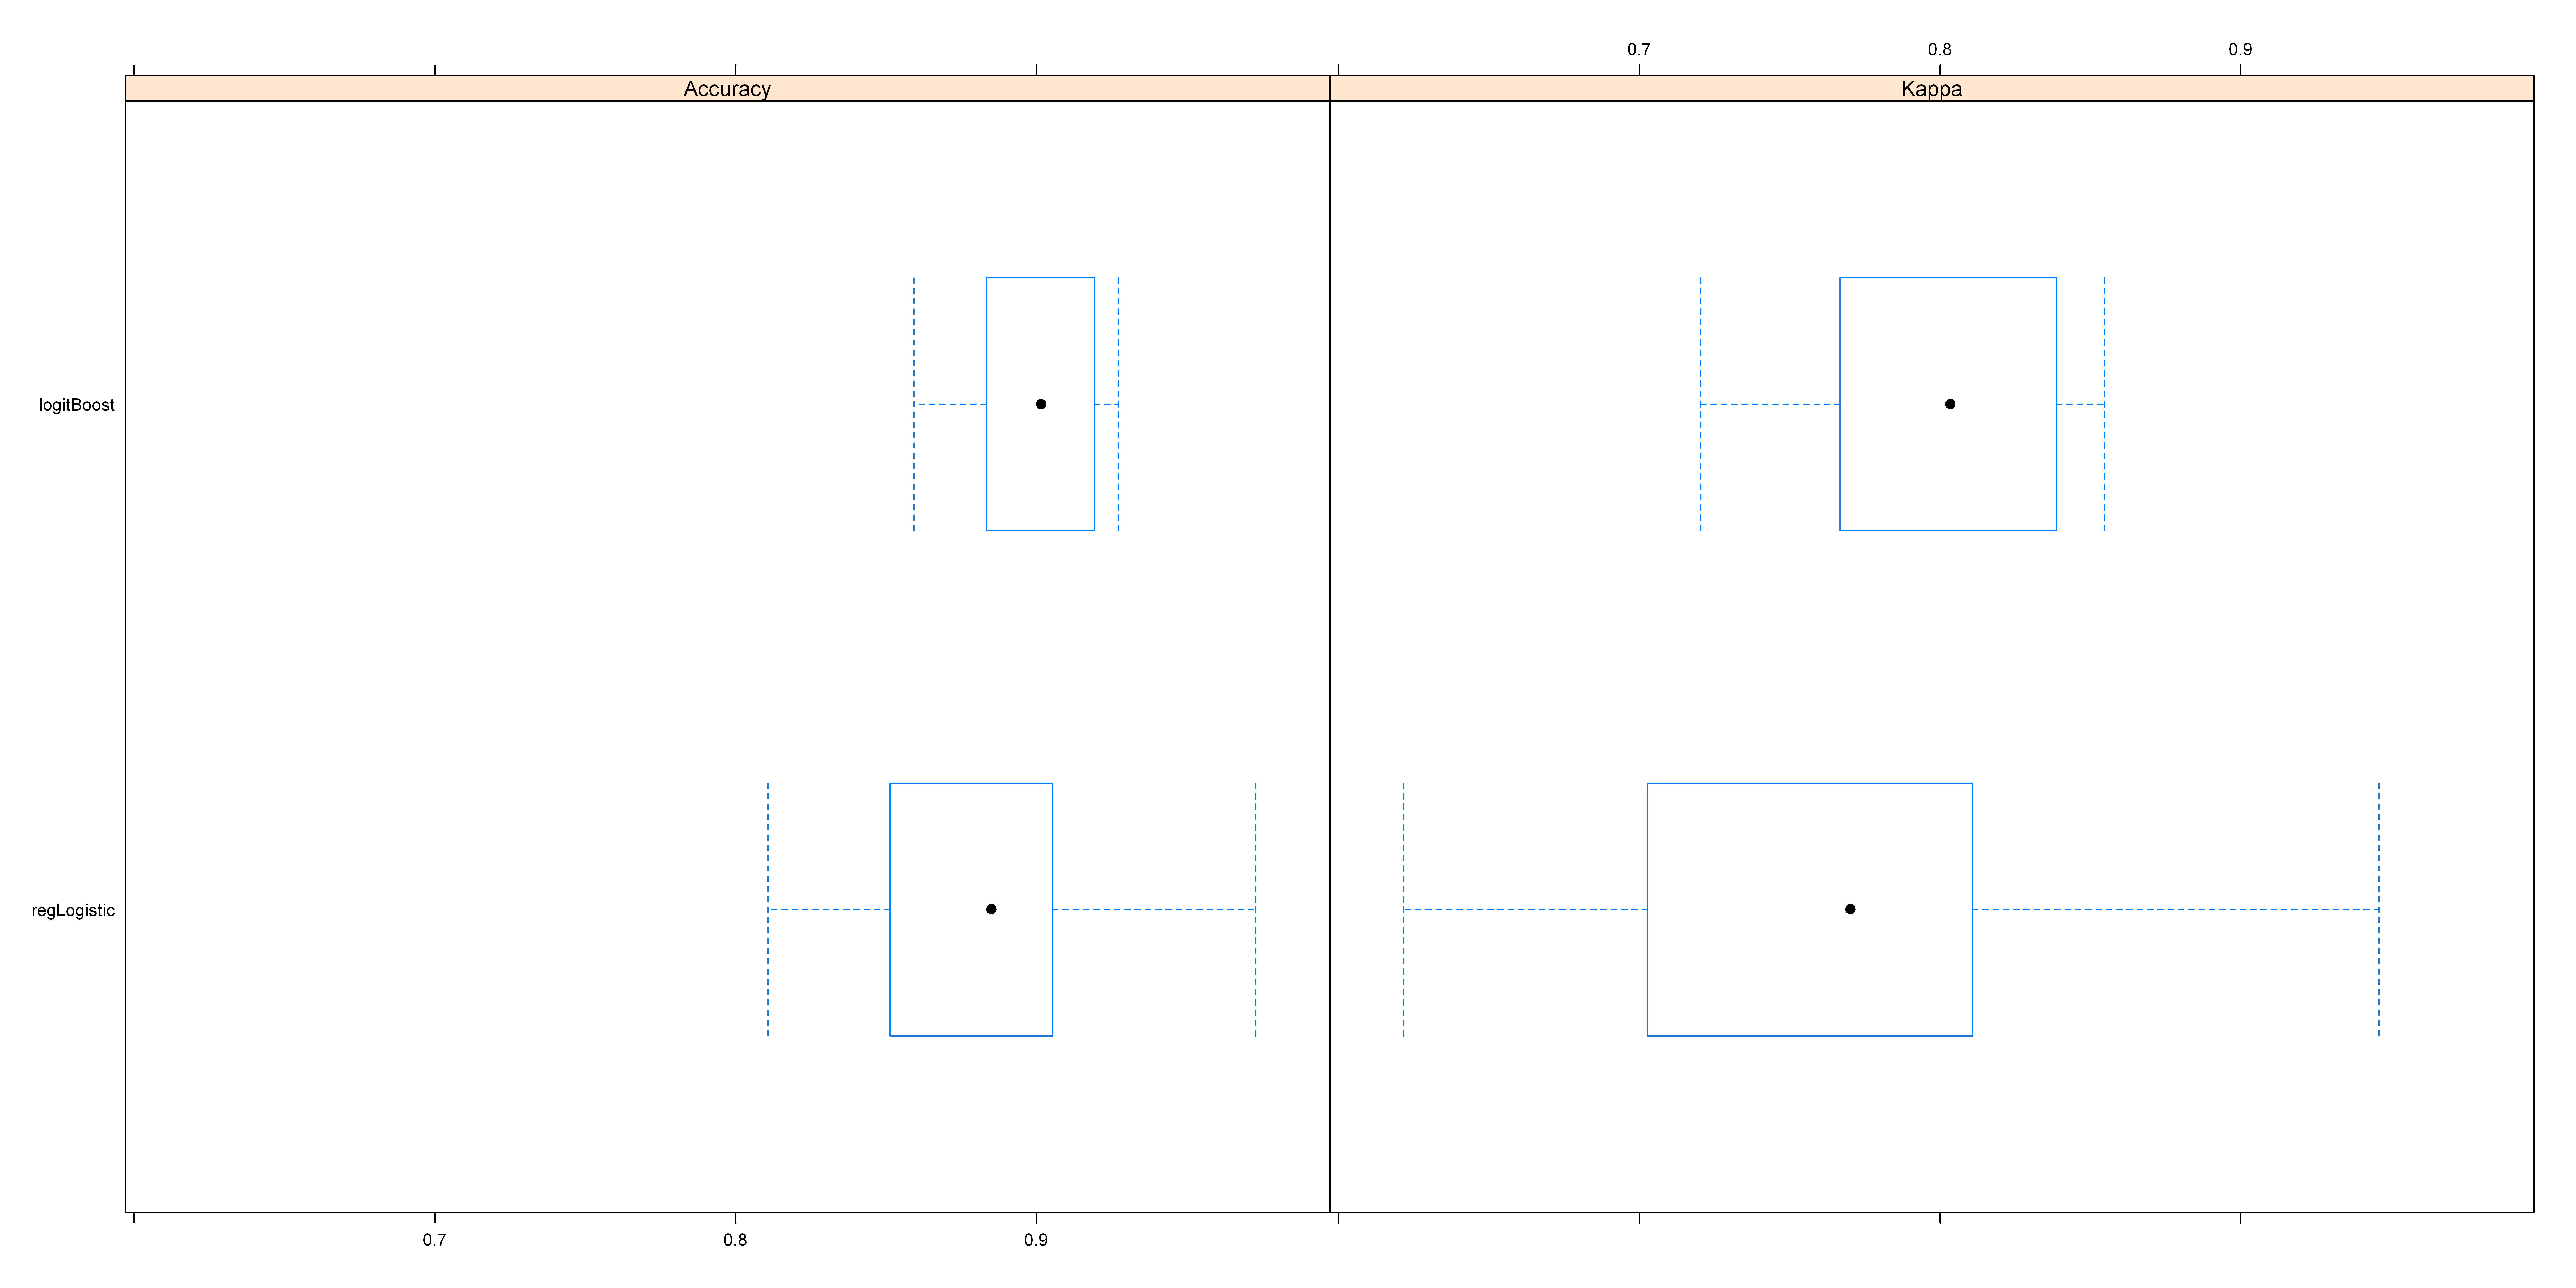

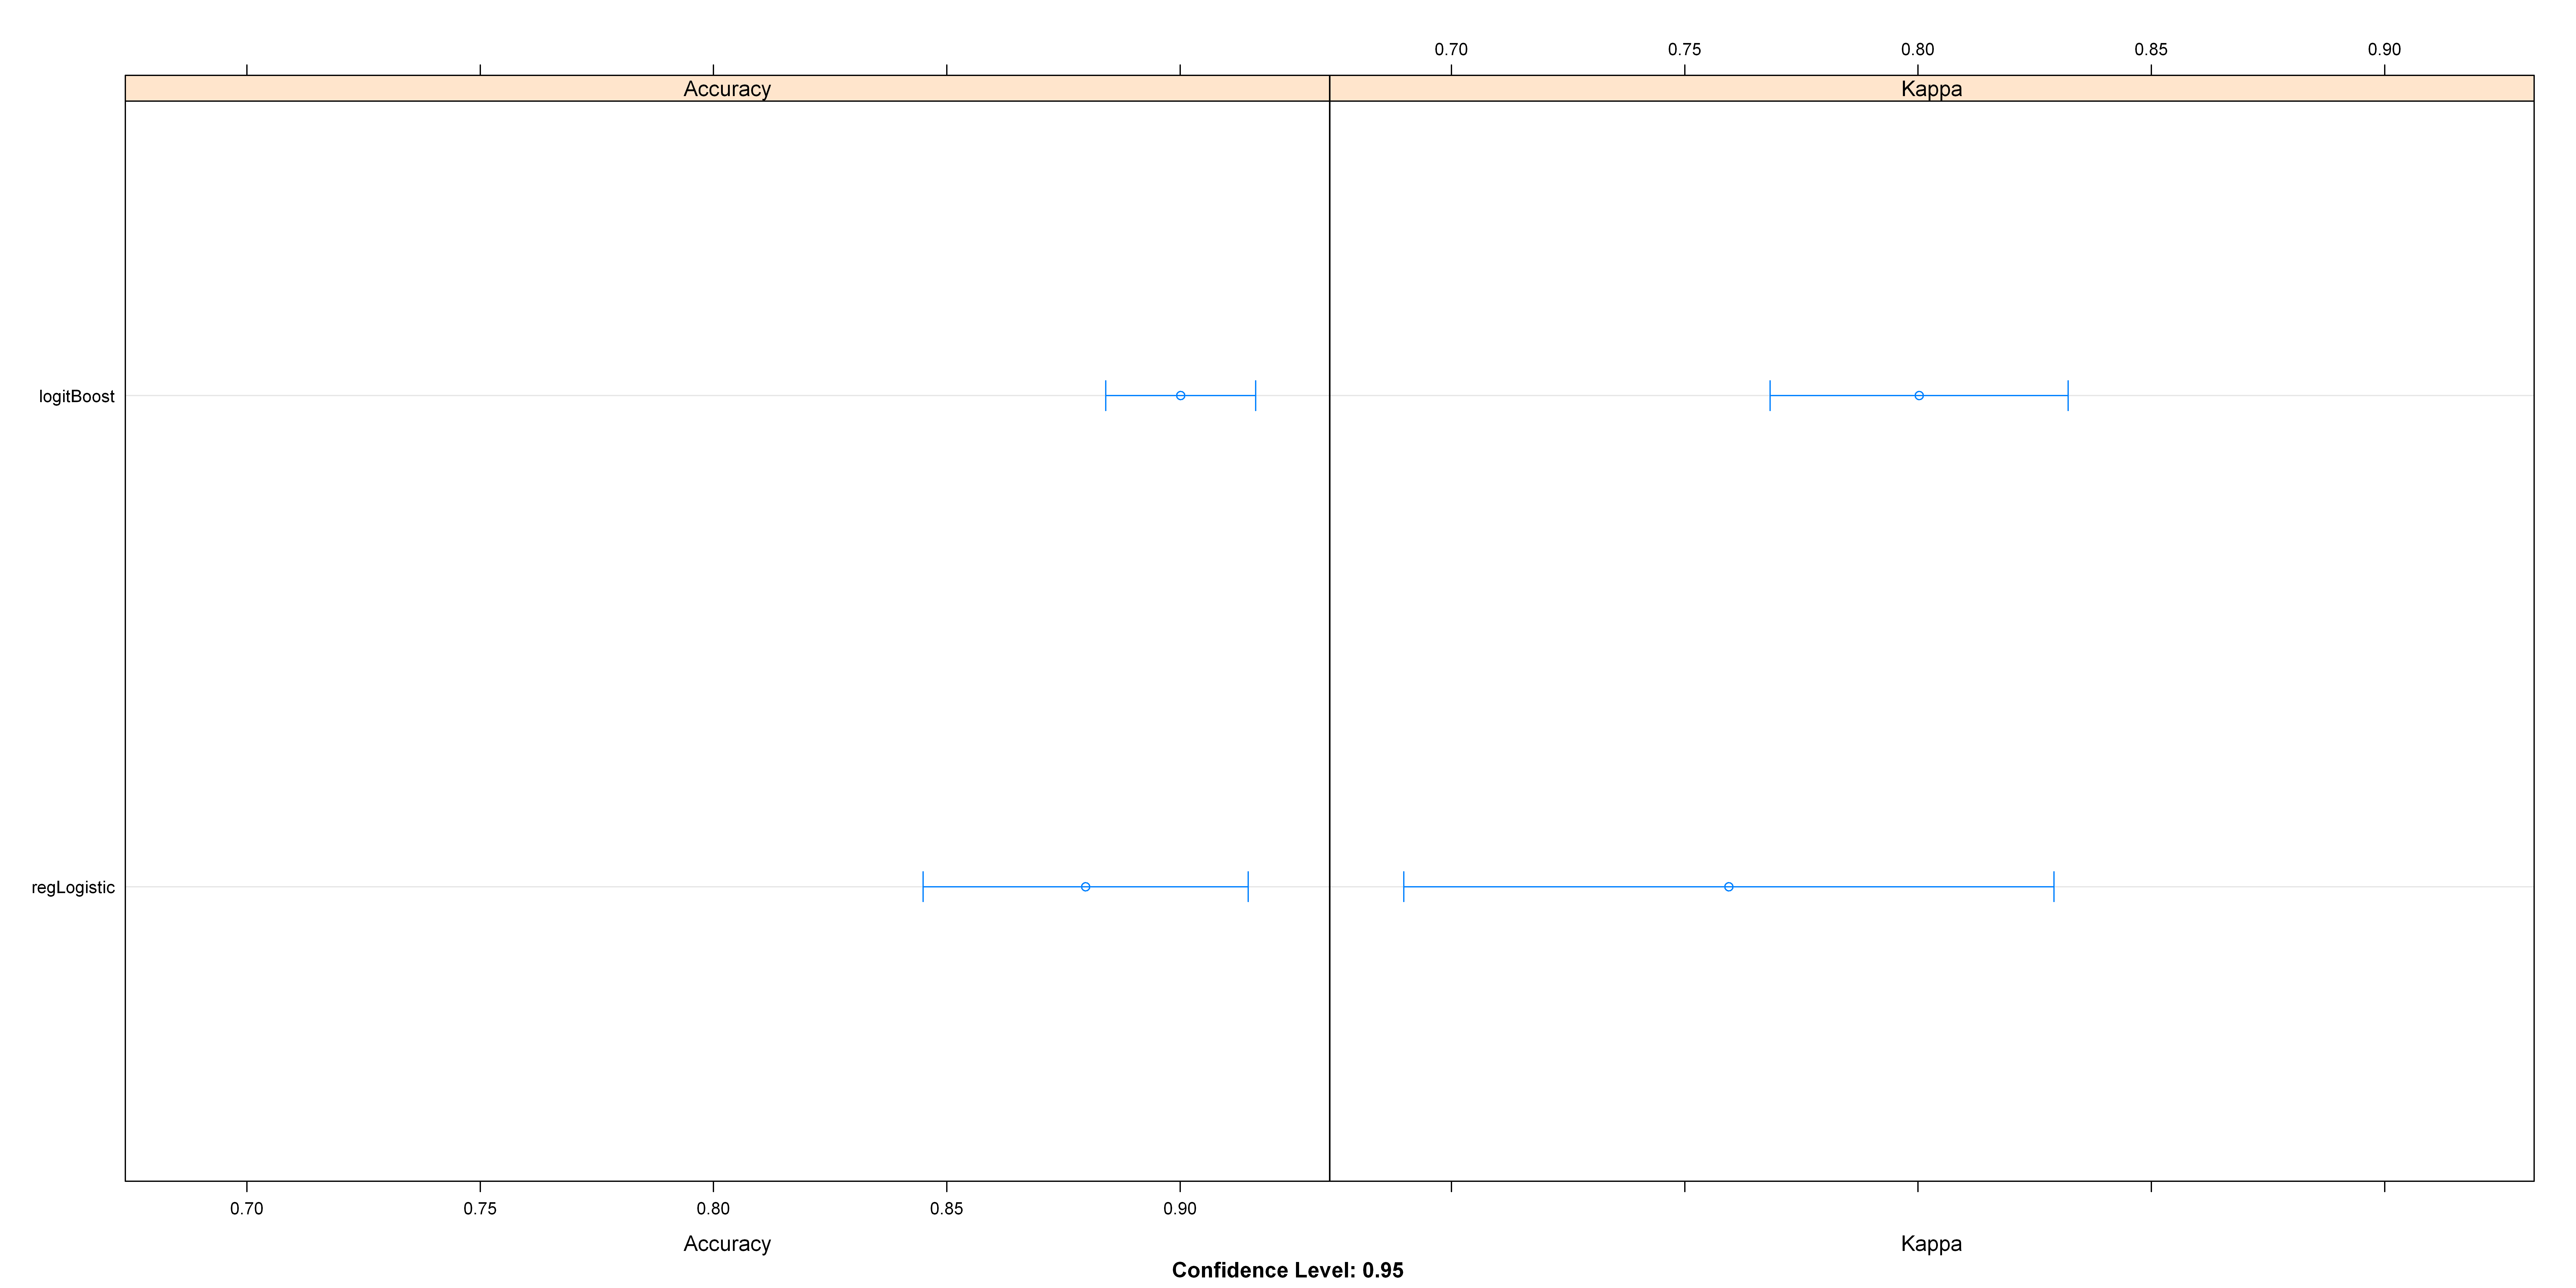

In [33]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [34]:
prop.table(table(df$deg_cat))


     fast   NotFast 
0.1322002 0.8677998 

In [35]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      20       7
   NotFast   41     169
                                          
               Accuracy : 0.7975          
                 95% CI : (0.7406, 0.8467)
    No Information Rate : 0.7426          
    P-Value [Acc > NIR] : 0.02933         
                                          
                  Kappa : 0.3522          
                                          
 Mcnemar's Test P-Value : 1.906e-06       
                                          
            Sensitivity : 0.32787         
            Specificity : 0.96023         
         Pos Pred Value : 0.74074         
         Neg Pred Value : 0.80476         
             Prevalence : 0.25738         
         Detection Rate : 0.08439         
   Detection Prevalence : 0.11392         
      Balanced Accuracy : 0.64405         
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
          0.32786885           0.96022727           0.74074074 
      Neg Pred Value            Precision               Recall 
          0.80476190           0.74074074           0.32786885 
                  F1           Prevalence       Detection Rate 
          0.45454545           0.25738397           0.08438819 
Detection Prevalence    Balanced Accuracy 
          0.11392405           0.64404806

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



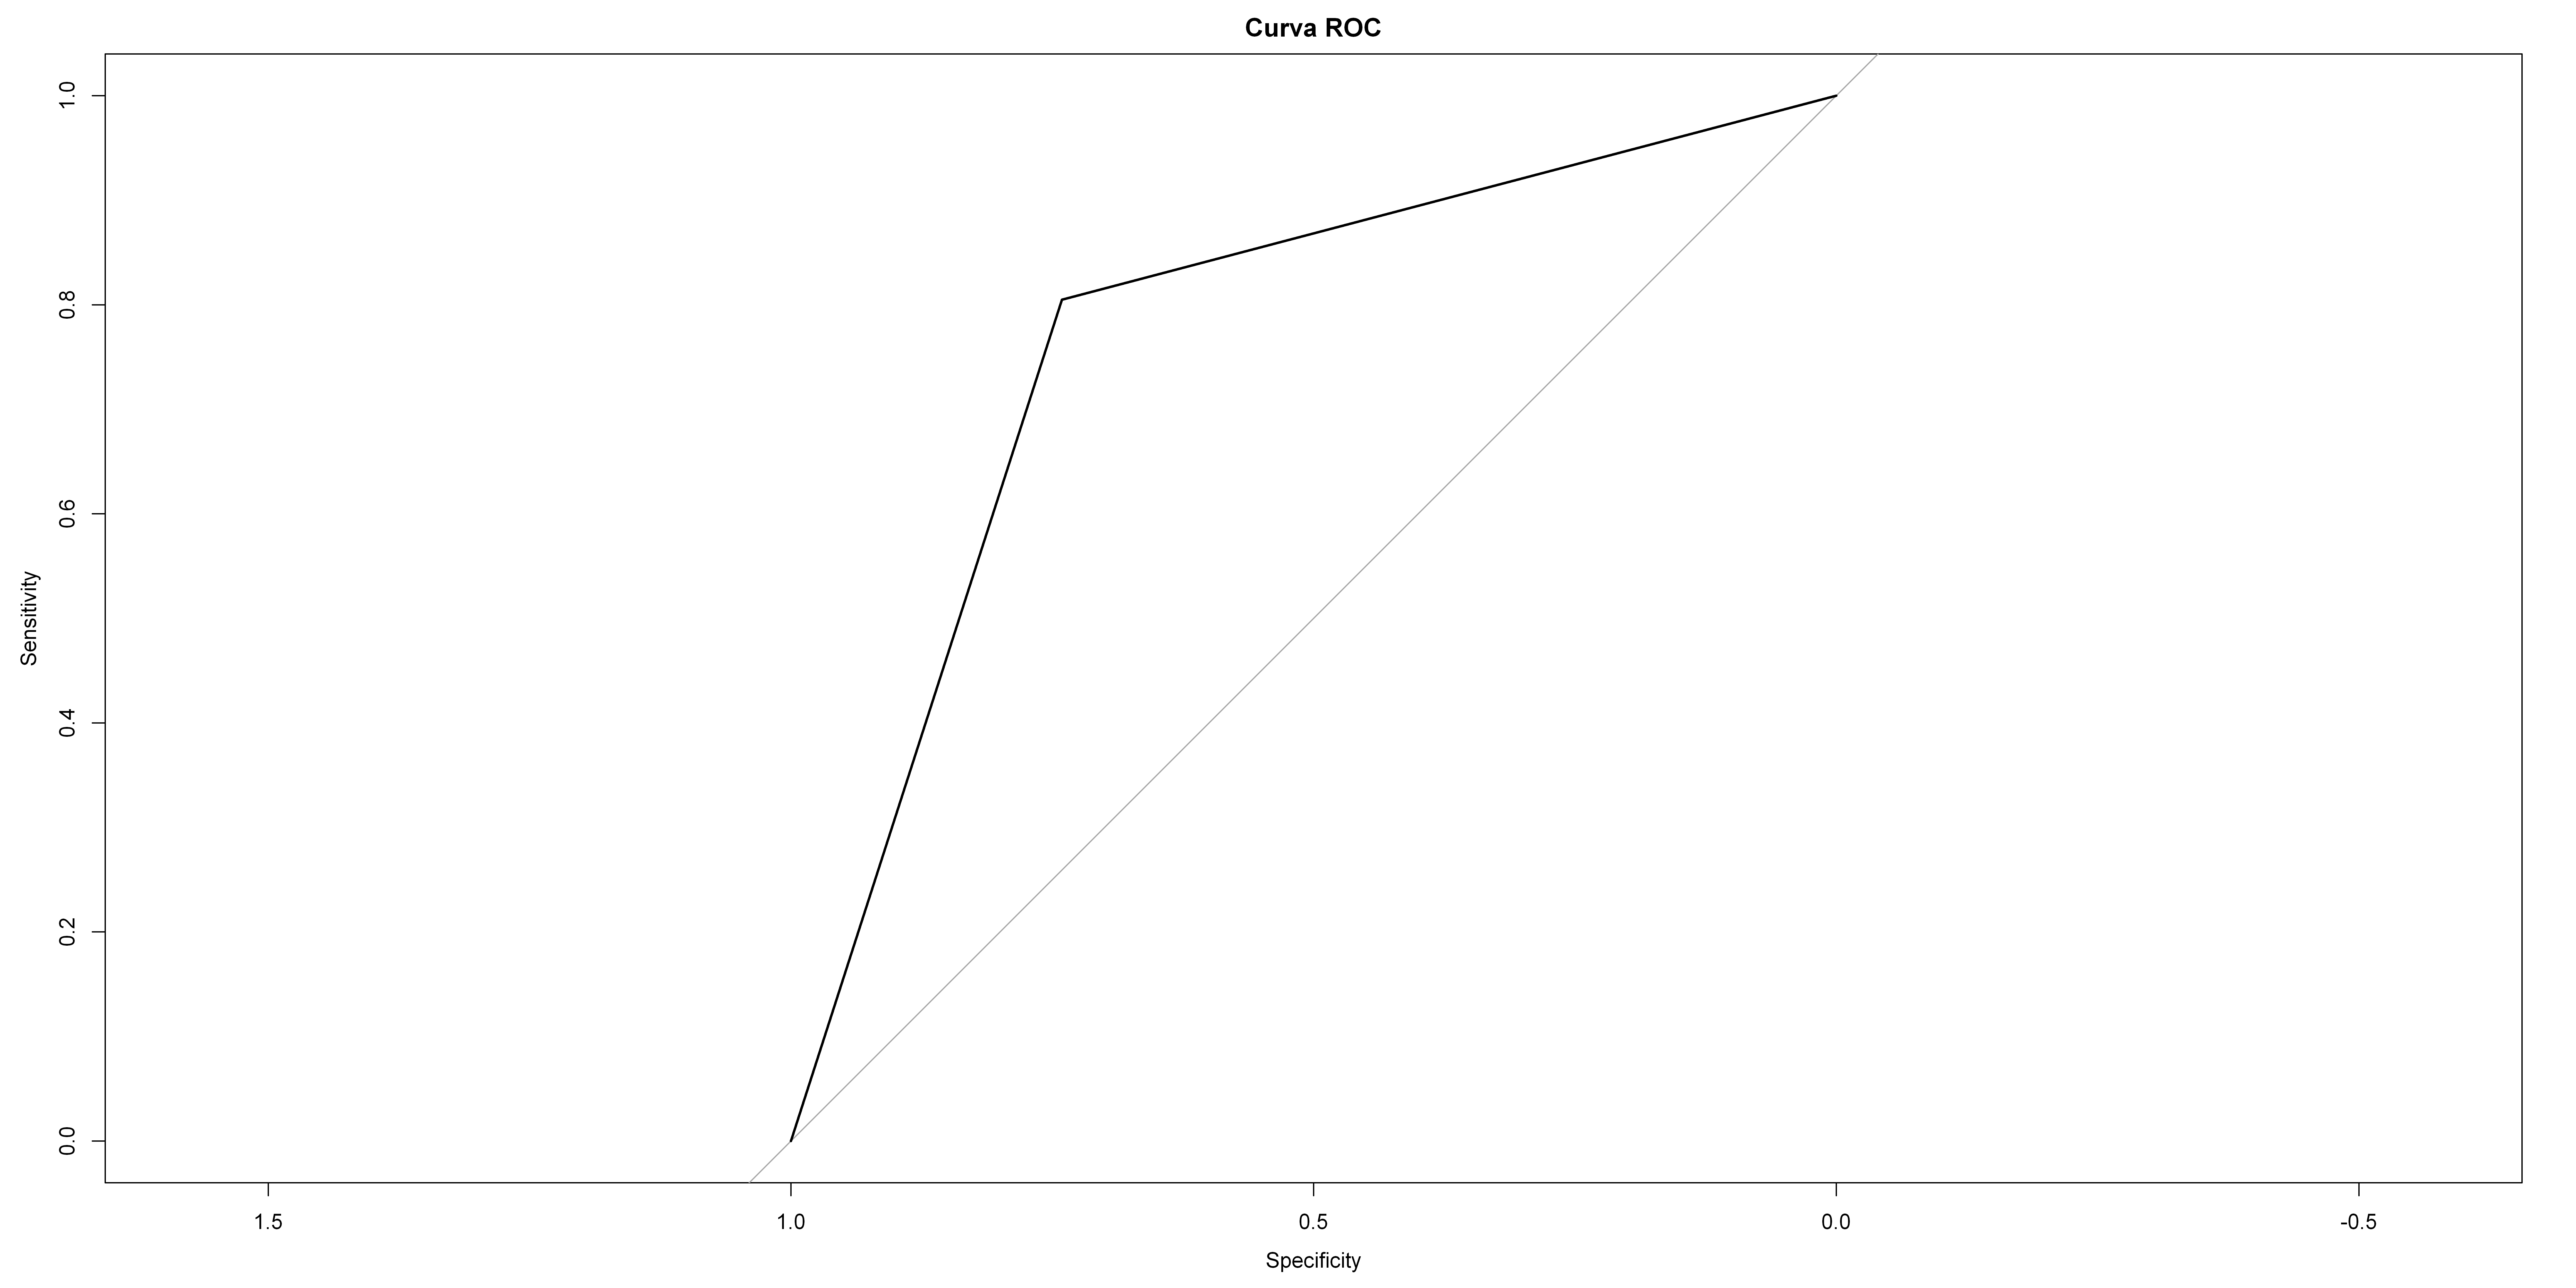

In [37]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [38]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 27 controls (TestClasses fast) < 210 cases (TestClasses NotFast).
Area under the curve: 0.7728

In [39]:
pred_logitBoost.prob

fast,NotFast
0.0003353501,0.9996646
0.0003353501,0.9996646
0.1192029220,0.8807971
0.0179862100,0.9820138
0.5000000000,0.5000000
0.8807970780,0.1192029
0.0179862100,0.9820138
0.5000000000,0.5000000
0.5000000000,0.5000000
0.1192029220,0.8807971
